#### Coding the program to find is there a significant difference btw Male and female spending 

In [1]:
# Import the file csv to get the columns Data and the pandas lib.
import pandas as pd

df=pd.read_csv('C:/Users/5530/OneDrive/Desktop/Mall_Customer_Segmentation/Data/customer_arrivals_removed_outliers_.csv')

In [ ]:
# import the function form the file 

import sys 
sys.path.append("..")

from Assumption_check import check_equal_variance,check_Normality

#### Using the imported funtion to check the criteria are checked before the analysis

In [3]:
male_spending = df[df['Gender']=='Male']['Total Spending']
female_spending = df[df['Gender']=='Female']['Total Spending']

check_Normality(male_spending,Group_name='MALE')
check_Normality(female_spending,Group_name='FEMALE')

check_equal_variance(male_spending,female_spending,label_1='Male',label_2='Female')


Checking the normality of the Group MALE

Shapiro test result statisticcs:0.9436 , p-value:0.0027

 ❌ Not Likely normal distribution.
------------------------------------------------------------
Checking the normality of the Group FEMALE

Shapiro test result statisticcs:0.9628 , p-value:0.0054

 ❌ Not Likely normal distribution.
------------------------------------------------------------
Checking the variance test btw Male and Female

Levene test result statisticcs:0.0017 , p-value:0.9673

✅ Likely equal var .
------------------------------------------------------------


#### Cases that can arise in this 
1. Both are normal and equal var
2. Normal but not equal var
3. One or both Not Normal 

#### In over case as we can ses the the Normal distrubtion is not present so we will go with the Mann-Whitney U Test(non-parametric alternative)

In [7]:
# Case 3
from scipy.stats import mannwhitneyu

u_stats ,p = mannwhitneyu(female_spending,male_spending,alternative="two-sided")

print(f" Mann-Whitney values:\n"
      f"    1. Statistics: {u_stats}\n"
      f"    2. P-value   : {p}\n")

# ✅ Checking the final result 
if p < 0.05 :
      print("😊 There is a statistically significant difference in spending behavior between genders.")
else:
      print("😔 We do not have enough evidence to say males and females spend differently.")

 Mann-Whitney values:
    1. Statistics: 4292.5
    2. P-value   : 0.10980036987956984

😔 We do not have enough evidence to say males and females spend differently.


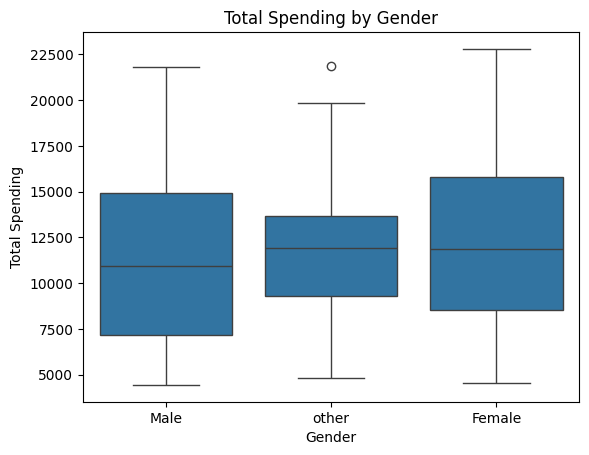

In [5]:
#Vislauization of the Gender and the total Spending 

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Gender', y='Total Spending', data=df)
plt.title('Total Spending by Gender')
plt.show()
